In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WorldBankDataset_no_heading.csv')

In [3]:
# Display the first few rows of the dataset
print(data.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2015         2016         2017         2018  \
0      58782.0  .

In [4]:
# Check for missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [5]:
# For this example, let's focus on total population data (e.g., for the year 2020)
data['2020'] = pd.to_numeric(data['2020'], errors='coerce')
data.dropna(subset=['2020'], inplace=True)  # Drop rows with missing population data for 2020

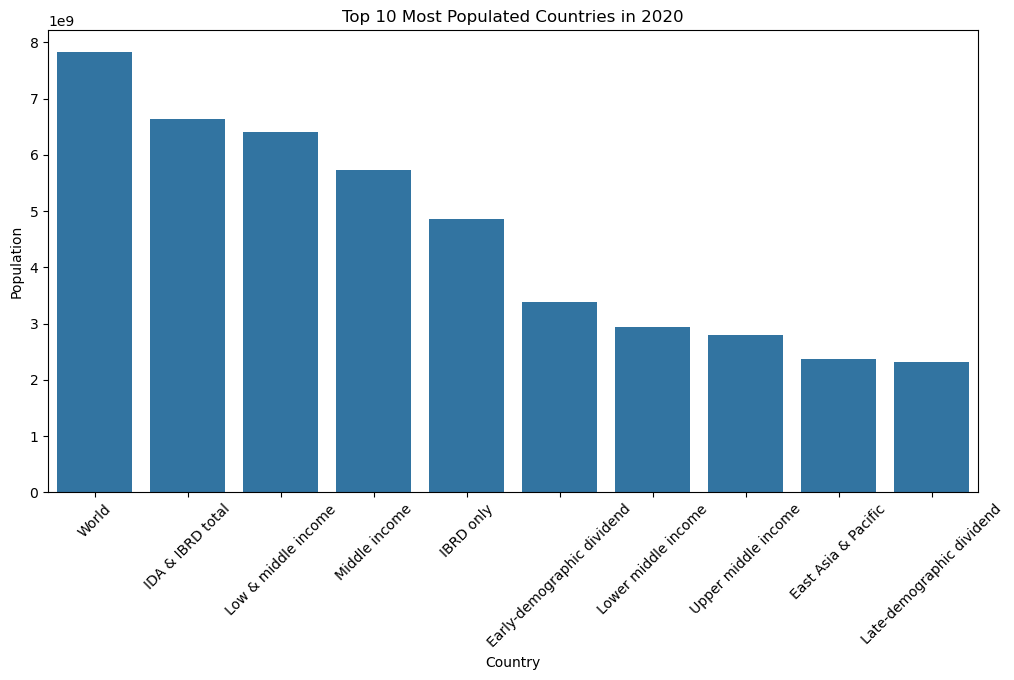

In [6]:
# A bar chart can be used to visualize the total population of the top 10 most populated countries in 2020.
top_countries = data.nlargest(10, '2020')

plt.figure(figsize=(12, 6))
sns.barplot(x='Country Name', y='2020', data=top_countries)
plt.title('Top 10 Most Populated Countries in 2020')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

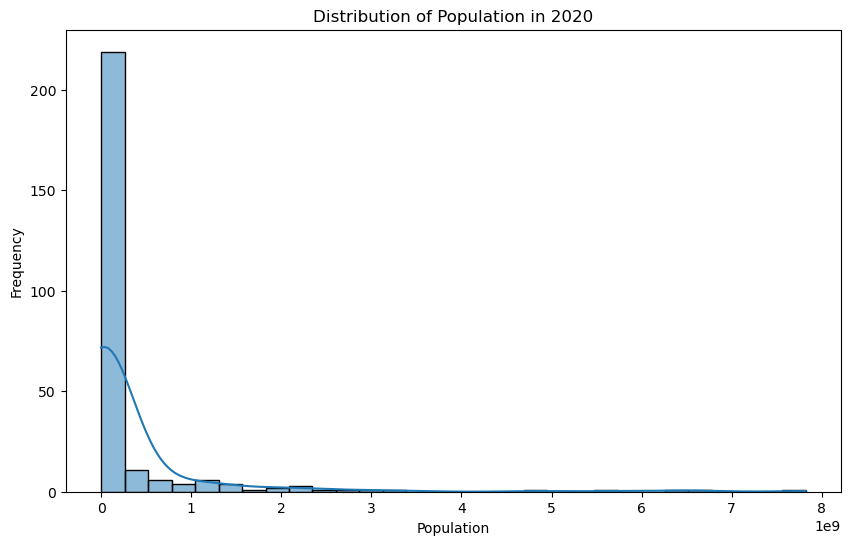

In [7]:
# A histogram can show the distribution of populations across all countries.
plt.figure(figsize=(10, 6))
sns.histplot(data['2020'], bins=30, kde=True)
plt.title('Distribution of Population in 2020')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x600 with 0 Axes>

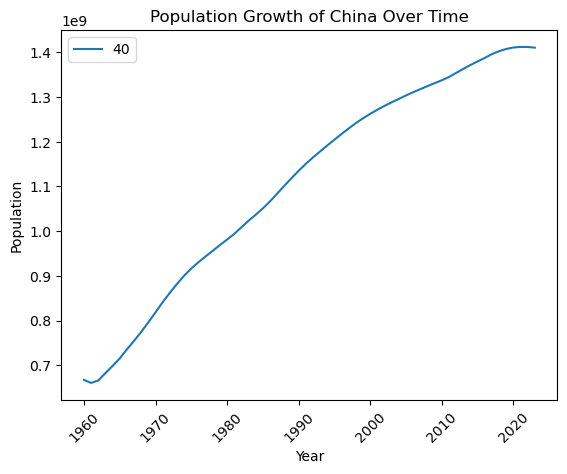

In [8]:
# A line plot can illustrate population growth trends over time for a specific country (e.g., China).
china_data = data[data['Country Name'] == 'China'].iloc[:, 4:]  # Select only population columns

plt.figure(figsize=(12, 6))
china_data.T.plot()
plt.title('Population Growth of China Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

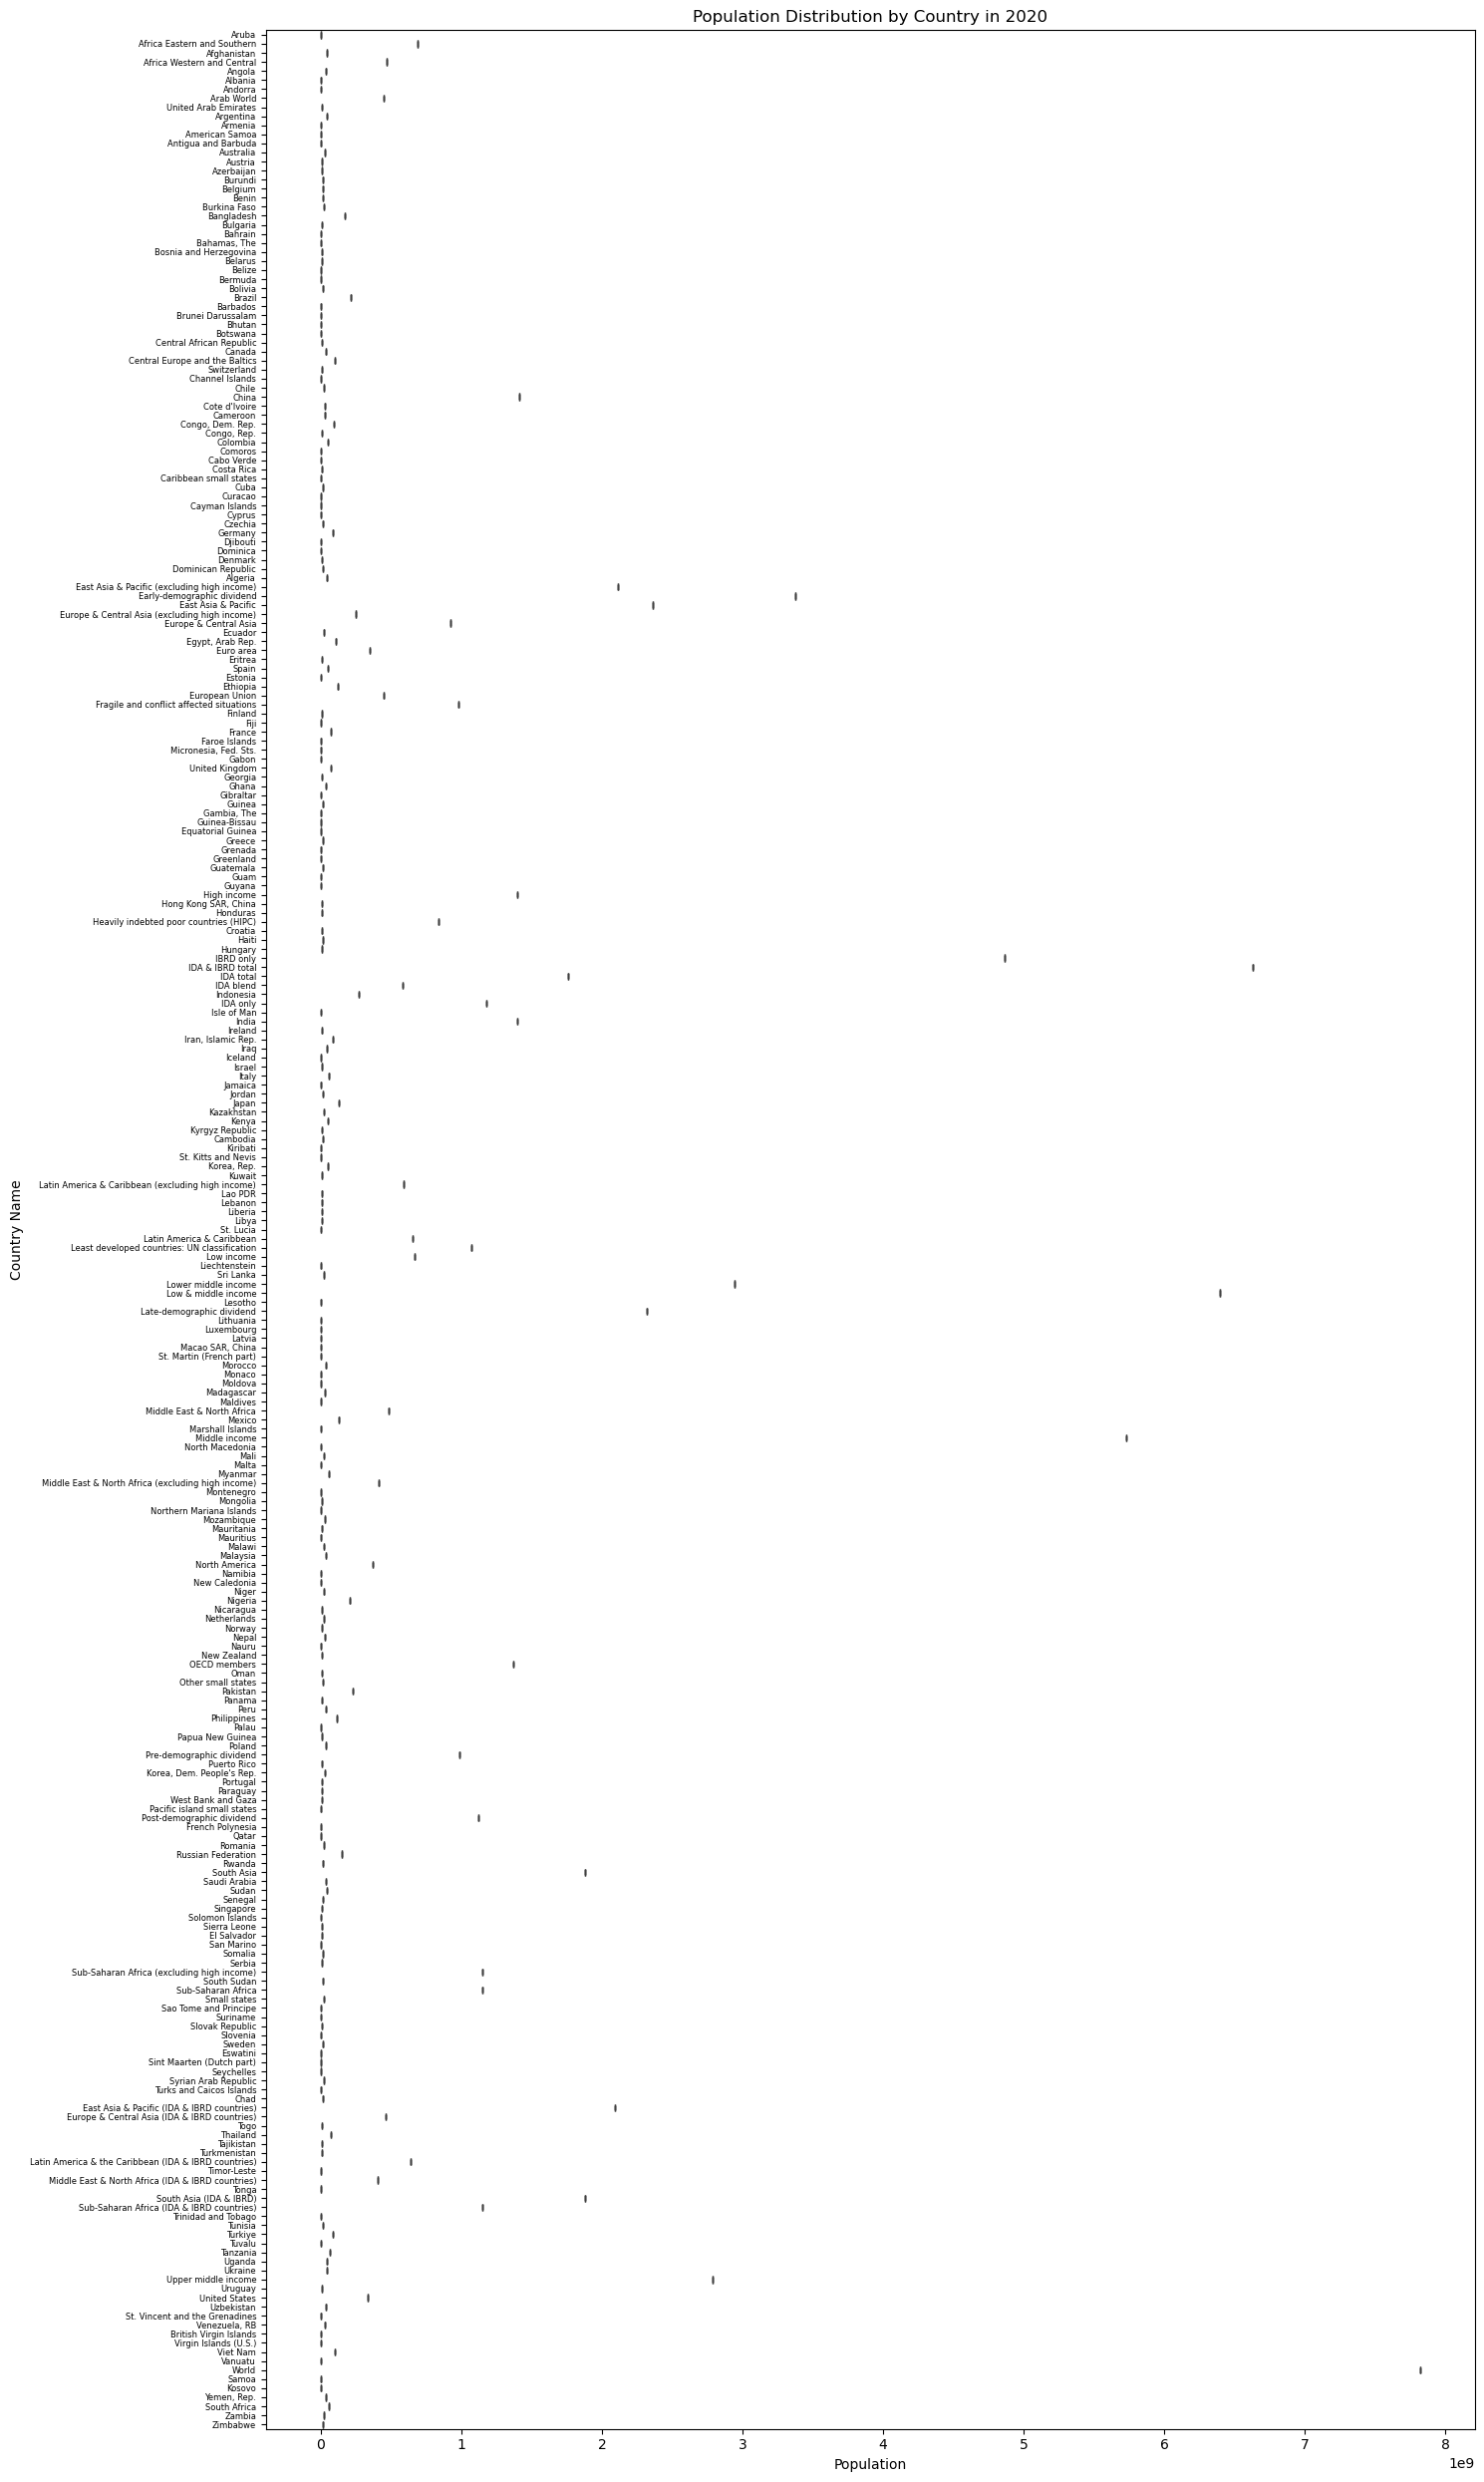

In [9]:
# A box plot can be used to show the spread of populations across different regions
plt.figure(figsize=(15, 25))  # Increase the figure size if needed
sns.boxplot(y='Country Name', x='2020', data=data)
plt.title('Population Distribution by Country in 2020')
plt.xlabel('Population')
plt.ylabel('Country Name')

# Adjust y-axis labels to prevent overlap
plt.yticks(rotation=0, fontsize=6)  # Rotate the labels and reduce font size if necessary

plt.tight_layout()  # Adjust the layout to make sure everything fits
plt.show()

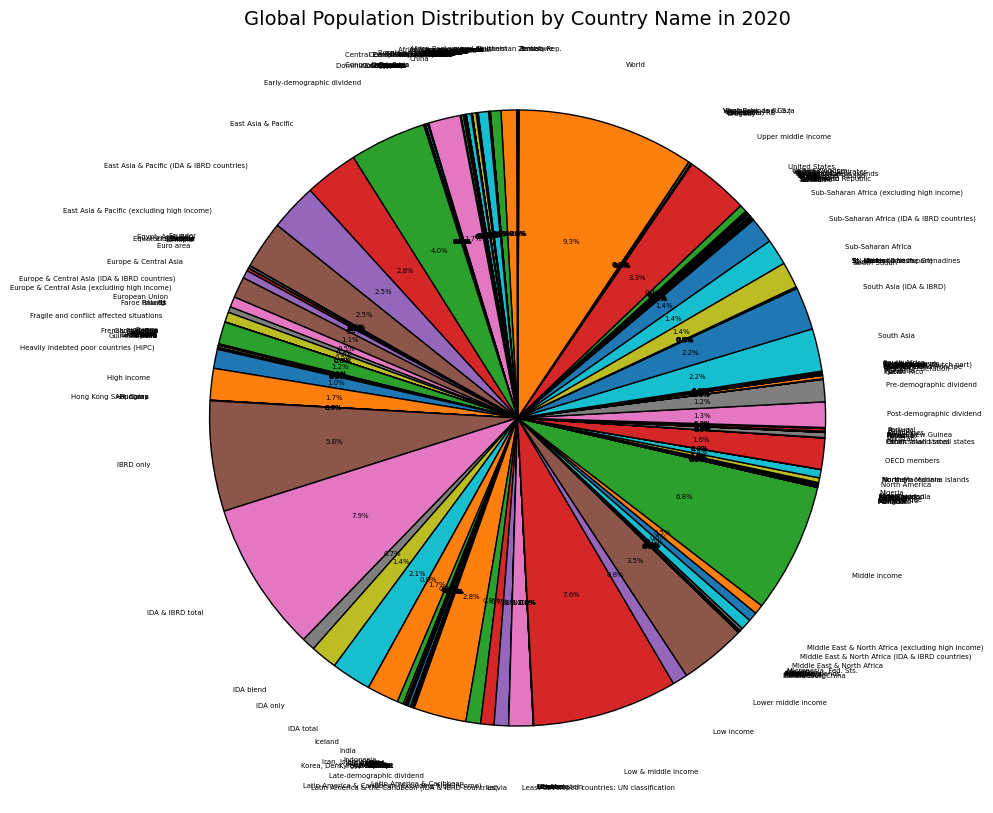

In [10]:
# A pie chart can represent the proportion of total global population by region.
# Calculate total population by country name
# Group the population data by 'Country Name'
region_population = data.groupby('Country Name')['2020'].sum()

# Plot the pie chart
plt.figure(figsize=(10, 10))  # Increase the figure size
region_population.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},  # Add border to each section
    textprops={'fontsize': 5},  # Decrease font size for clarity
    pctdistance=0.6,  # Distance of the percentage from the center
    labeldistance=1.2  # Increase distance of labels from the pie
)

# Set the title
plt.title('Global Population Distribution by Country Name in 2020', fontsize=14)

# Remove the y-axis label (optional)
plt.ylabel('')

# Display the plot
plt.show()

In [13]:
df = pd.read_csv('WorldBankDataset_no_heading.csv')

# Filter for the 'Population, total' indicator
population_df = df[df['Indicator Name'] == 'Population, total']

# Drop rows with missing country names or values
population_df = population_df.dropna(subset=['Country Name'])

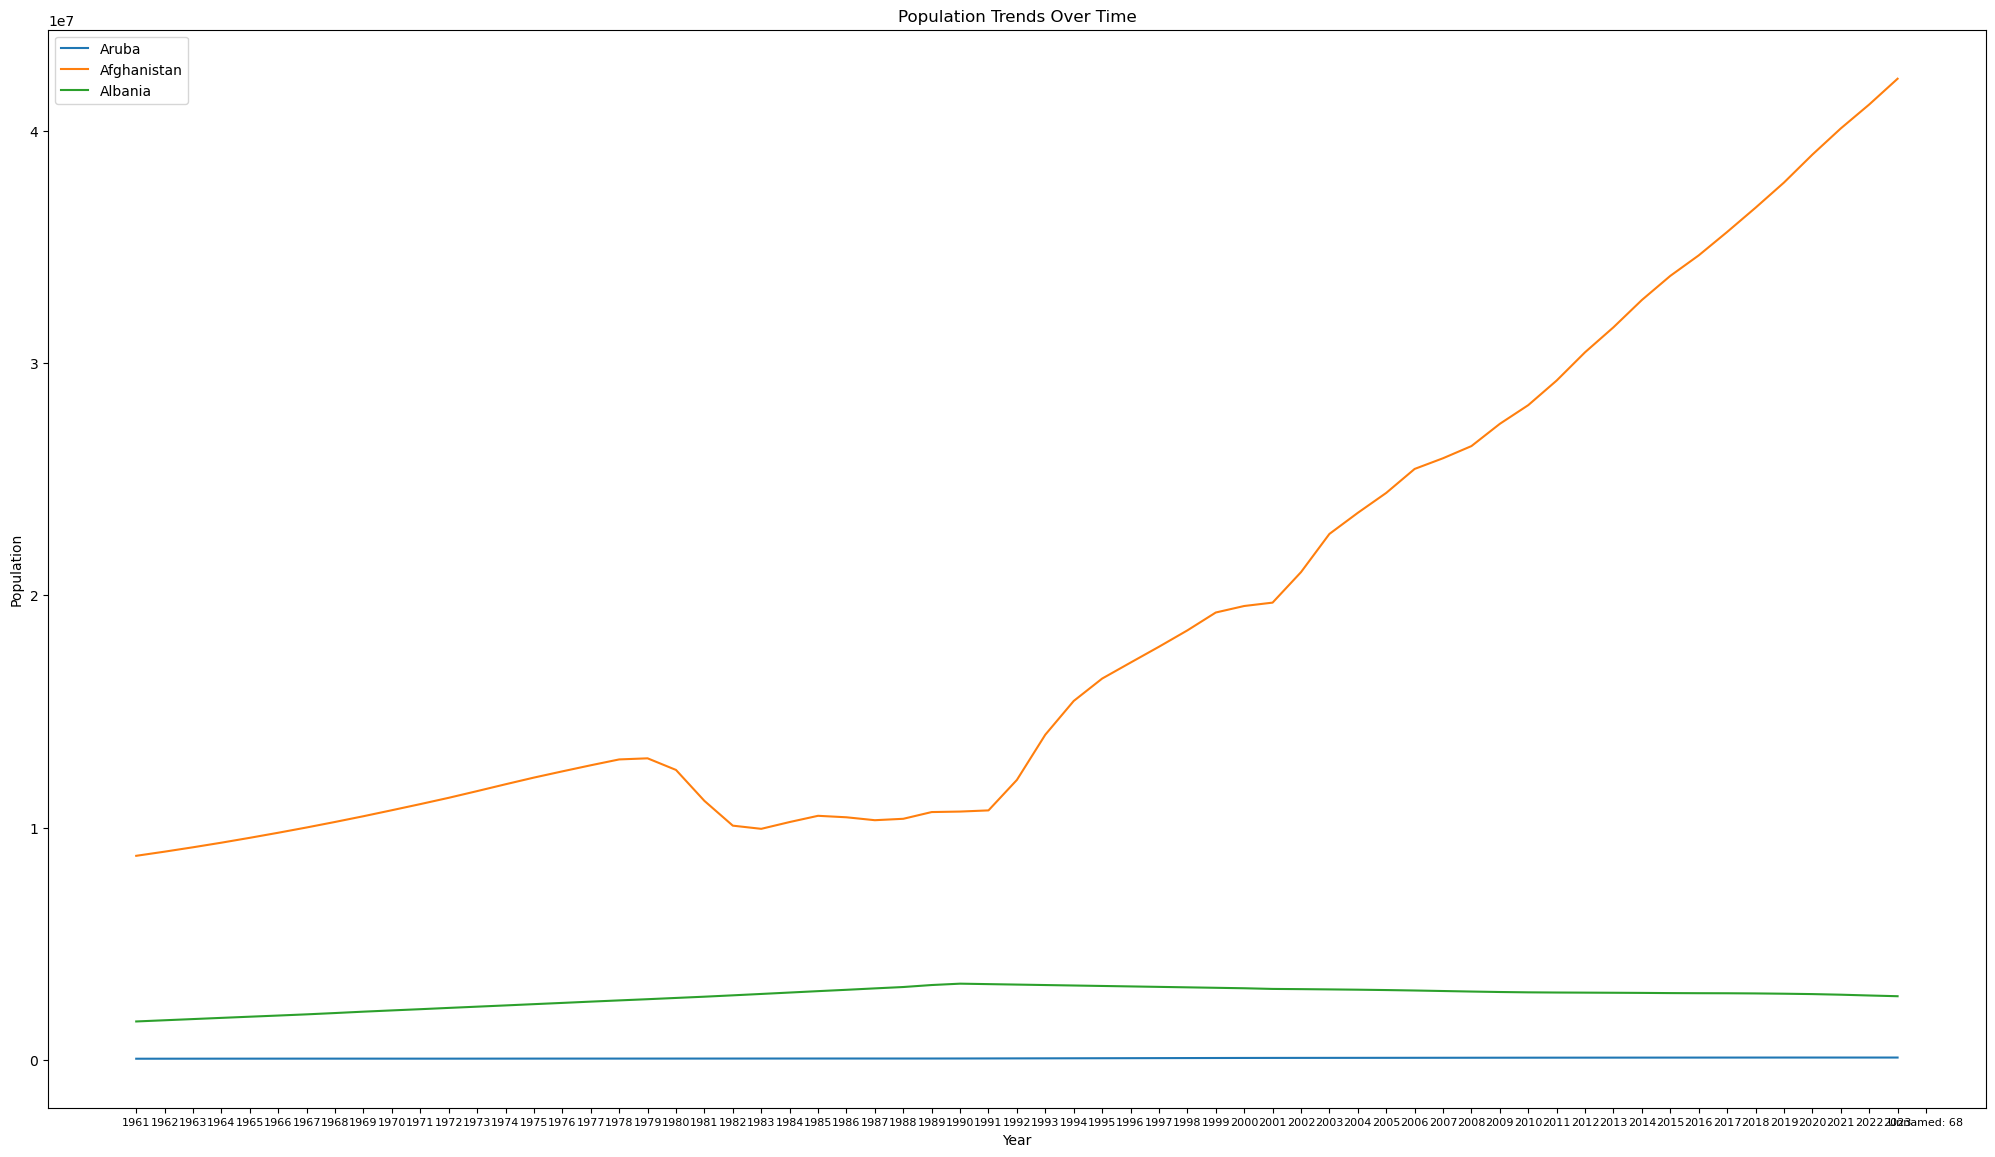

In [14]:
# Select a few countries
countries = ['Aruba', 'Afghanistan', 'Albania']
subset = population_df[population_df['Country Name'].isin(countries)]

# Transpose the data for easier plotting
subset_years = subset.set_index('Country Name').T[4:]  # Skip non-year columns
subset_years.columns = countries

# Plot
plt.figure(figsize=(25, 14))
for country in countries:
    plt.plot(subset_years.index, subset_years[country], label=country)
plt.xticks(rotation=0, fontsize=8)
plt.legend()
plt.title('Population Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()


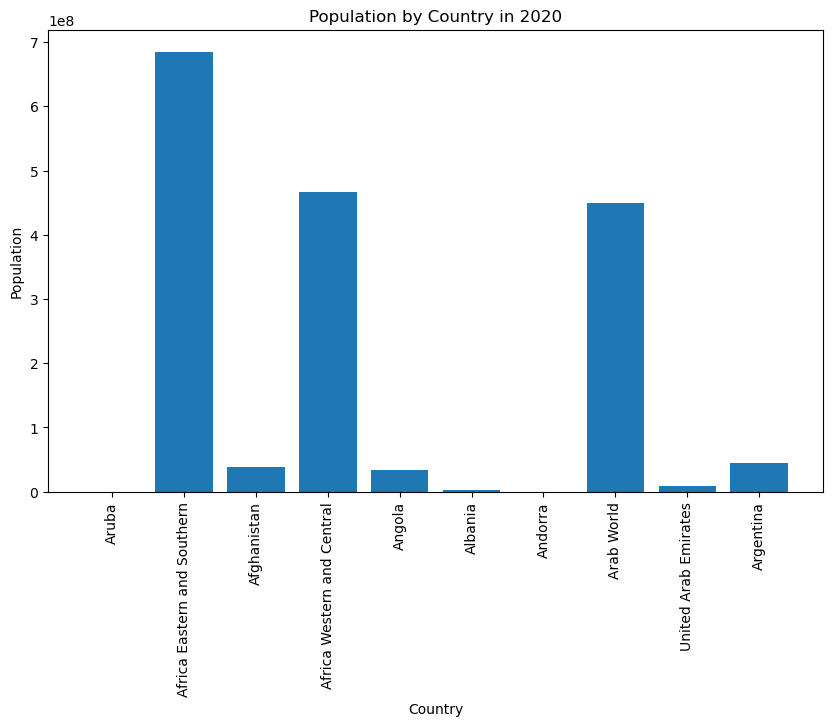

In [15]:
# Choose data for 2020
year = '2020'
pop_2020 = population_df[['Country Name', year]].dropna()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(pop_2020['Country Name'][:10], pop_2020[year][:10])  # Limiting to 10 countries for clarity
plt.xticks(rotation=90)
plt.title('Population by Country in 2020')
plt.xlabel('Country')
plt.ylabel('Population')
plt.show()

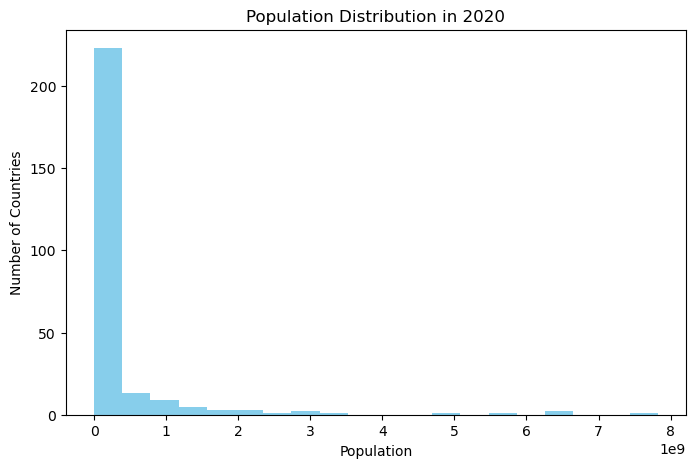

In [16]:
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(pop_2020[year], bins=20, color='skyblue')
plt.title('Population Distribution in 2020')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.show()

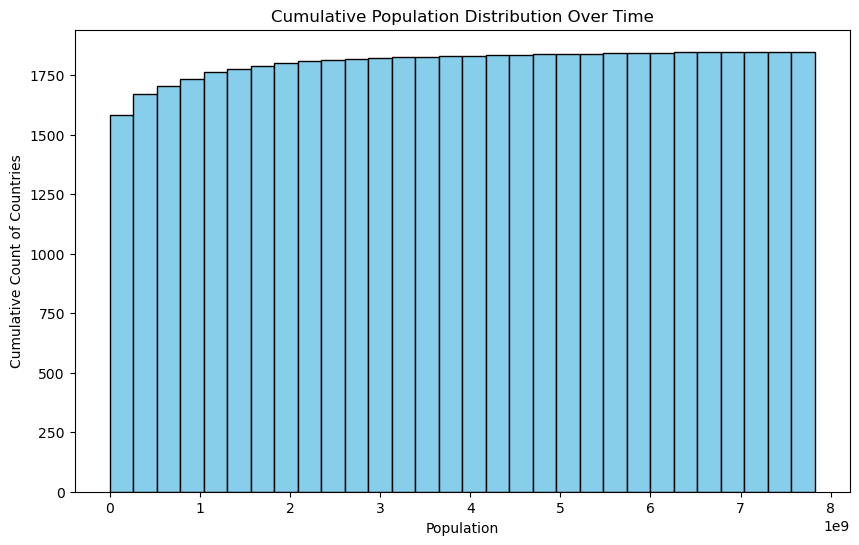

In [17]:
# Choose years for analysis (e.g., every 10 years)
years_to_analyze = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']

# Extract data for those years
pop_over_time = population_df[years_to_analyze].dropna()

# Plot cumulative histogram
plt.figure(figsize=(10, 6))
plt.hist(pop_over_time[years_to_analyze].values.flatten(), bins=30, cumulative=True, color='skyblue', edgecolor='black')
plt.title('Cumulative Population Distribution Over Time')
plt.xlabel('Population')
plt.ylabel('Cumulative Count of Countries')
plt.show()

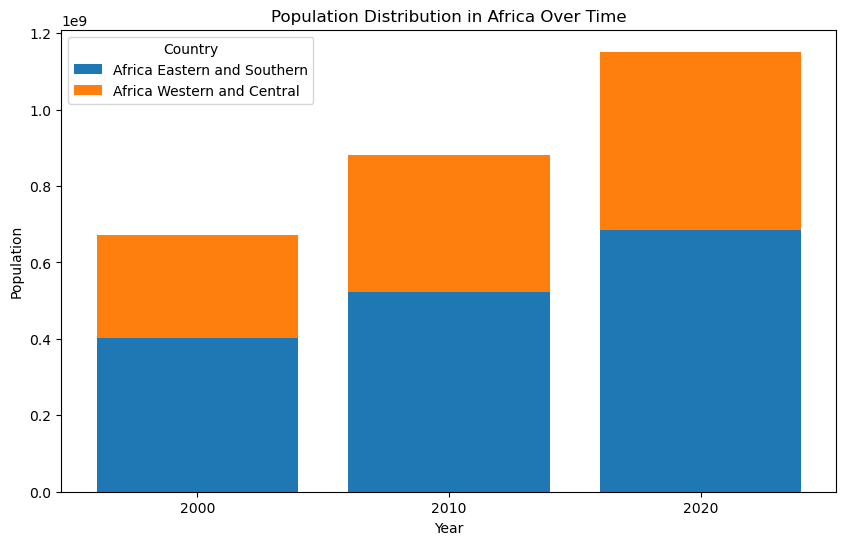

In [18]:
# Select a few countries from a region (e.g., Africa)
africa_countries = ['Africa Eastern and Southern', 'Africa Western and Central']
years_to_analyze = ['2000', '2010', '2020']

# Filter the data
subset_africa = population_df[population_df['Country Name'].isin(africa_countries)][['Country Name'] + years_to_analyze]

#Import numpy
import numpy as np

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(years_to_analyze))  # Initialize the bottom for stacking
for country in africa_countries:
    # Convert values to numeric type and handle potential errors
    values = pd.to_numeric(subset_africa[subset_africa['Country Name'] == country].iloc[0, 1:], errors='coerce')
    plt.bar(years_to_analyze, values, bottom=bottom, label=country)
    bottom += values

# Add labels and formatting
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Distribution in Africa Over Time')
plt.legend(title='Country')
plt.show()

C:\Users\sreem\AppData\Local\Temp\ipykernel_10748\1663261261.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pop_2020['2020'], shade=True, color='blue')


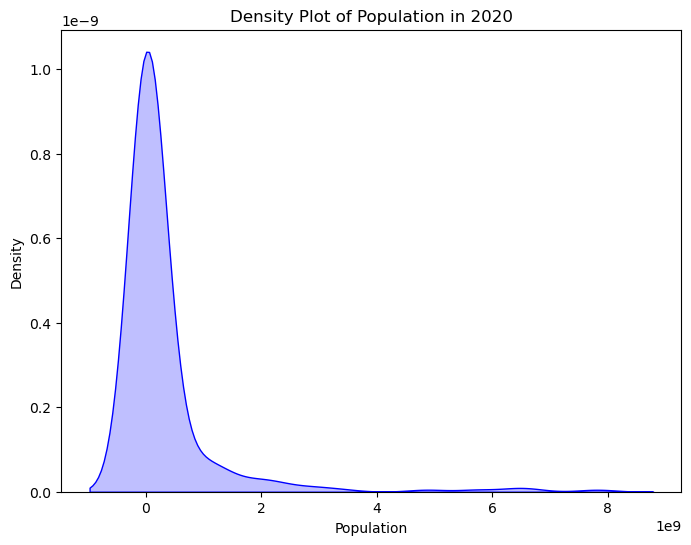

In [19]:
# A density plot is a smoothed version of the histogram and helps to visualize the distribution of population densities.
import seaborn as sns

# Select data for a specific year (e.g., 2020)
pop_2020 = population_df[['Country Name', '2020']].dropna()

# Plot density plot using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(pop_2020['2020'], shade=True, color='blue')
plt.title('Density Plot of Population in 2020')
plt.xlabel('Population')
plt.ylabel('Density')
plt.show()